In [ ]:
import numpy as np                        #행렬 연산 처리
import pandas as pd                       #데이터 처리 및 분석 
import matplotlib.pyplot as plt           #데이터 시각화 (차트화)
import seaborn as sns                     #데이터 분포 시각화

plt.style.use('seaborn')
sns.set(font_scale=2.5)                   #matplotlib 의 기본 scheme import matplotlib.pyplot as plt plt.rc('font', size=20)  # 기본 폰트 크기  이렇게 사용 하는 방법 대신
                                          # 일일이 graph 의 font size 를 지정할 필요 없이 
                                          #seaborn 의 font_scale 을 사용하는 방법.

import missingno as msno                  #결측치 시각화 패키지   

                                          #ignore warnings
import warnings
warnings.filterwarnings('ignore')

 #notebook을 실행한 브라우저에서 바로 그림  결과물(Rich output)을 볼 수 있게 해주는 것
%matplotlib inline                   

In [ ]:
#데이터 불러오기
df_train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##1. 데이터 셋 확인하기


---

survival : 생존여부

Pclass : 티켓의 클래스 (1,2,3)

sex : 성별

Age: 나이

sibSp : 함께 탑승한 형제와 배우자의 수

parch : 함께 탑승한 부모, 아이의 수

ticket : 티켓 번호

fare : 탑승료

cabin : 객실 번호

embared : 탑승 항구

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 결측치 확인하기


---

 {:>10}: 오른쪽 정렬

 

 {:.2f}: 소수점 둘째자리까지 출력

 

 df_train[col].isnull().sum() : 해당 열의 결측치가 몇개인지 알 수 있게하는 문장

(TRUE=1(결측치), FALSE=0으로 계산)

 

 df_train[col].shape[0] : 해당 열의 차원 (열이 지정되어 있으므로 행의 갯수를 보여줍니다.)

 

 100 * (df_train[col].isnull().sum() / df_train[col].shape[0] : 쉽게 말하자면 100 * (결측치/전체 데이터)를 의미하며,


In [ ]:
# 변수 별 결측치를 %로 확인해보기
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [ ]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


### train set : Age, Cabin, Embarked 에 결측치 있음.
→ 시각화

<Axes: >

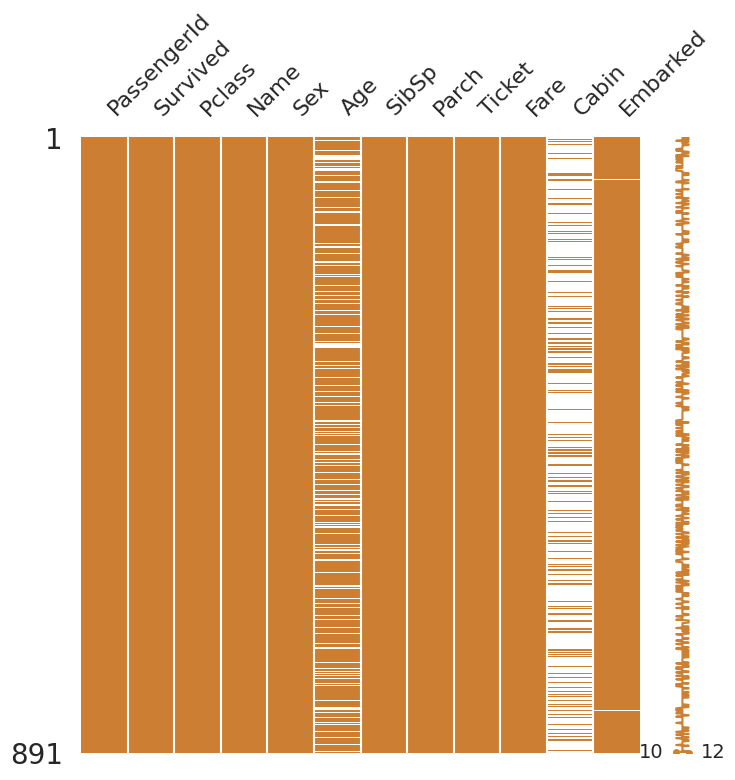

In [ ]:
# missingno 패기지 (matrix 사용)
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

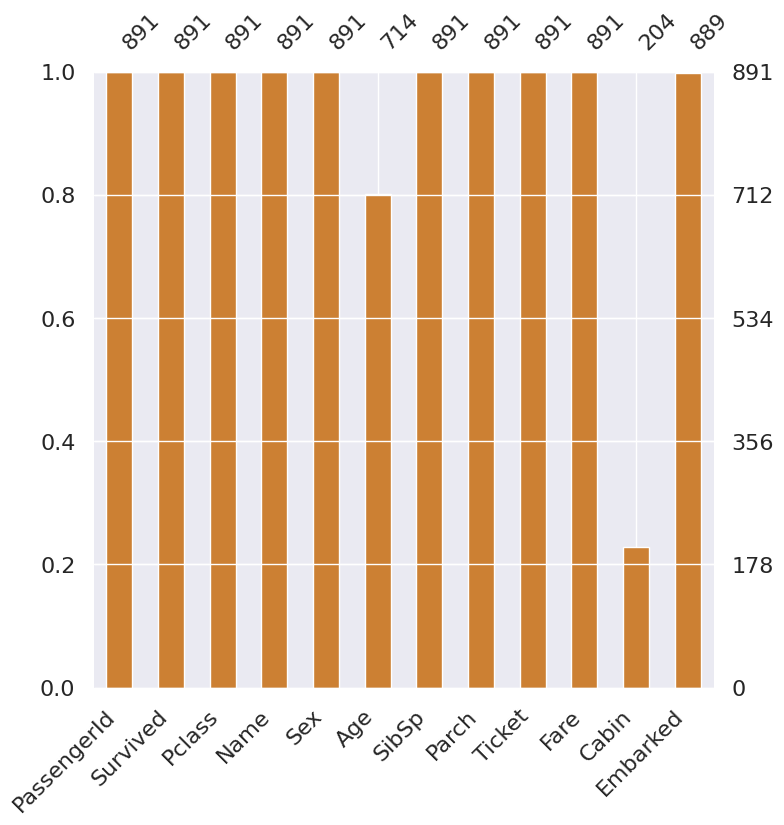

In [ ]:
# Bar Chart
# color 파라미터는 RGB를 지정해주는 것
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

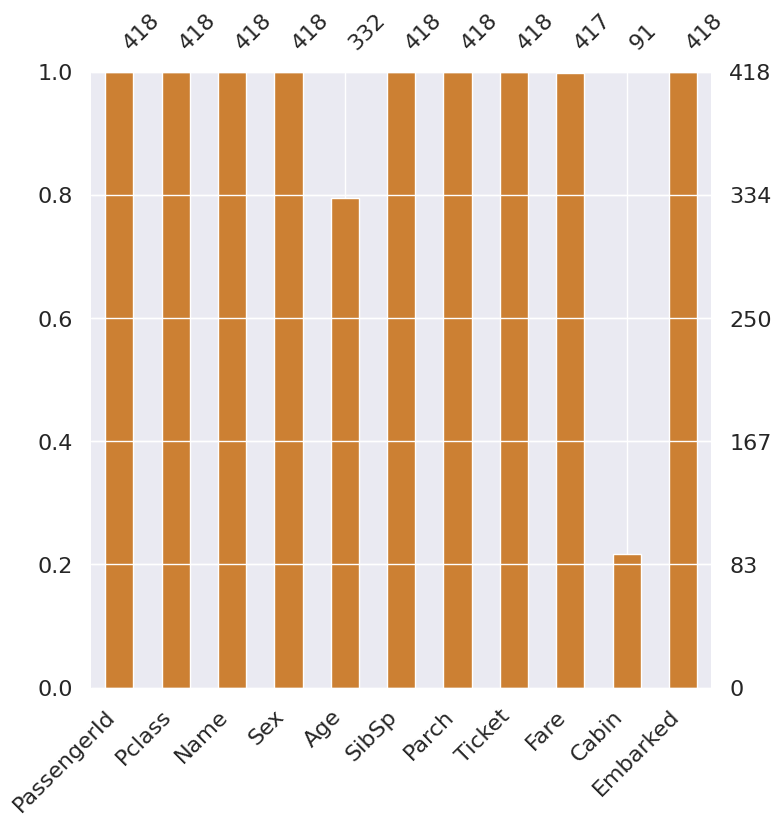

In [ ]:
# Bar Chart
# color 파라미터는 RGB를 지정해주는 것
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

 ## 다루고자 하는 feature : Pclass, Age, SibSp, Parch, sex

## 예측하고자 하는 feature : Survived (생존 여부)

In [ ]:
sns.catplot(data=df_train, x='Sex', y='Survived', col='Pclass',
               size=9, aspect=1
              )

SyntaxError: ignored

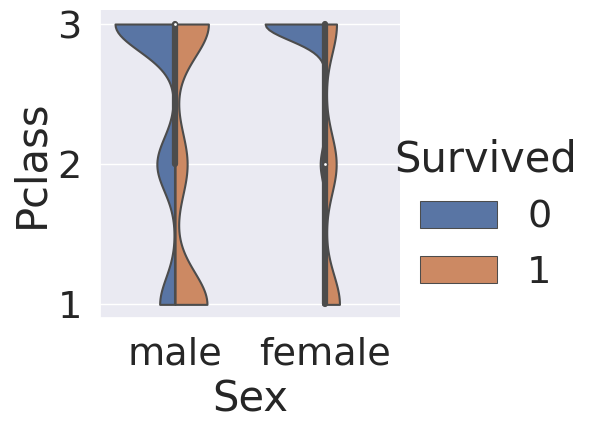

In [54]:
sns.catplot(data=df_train, x="Sex", y="Pclass", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

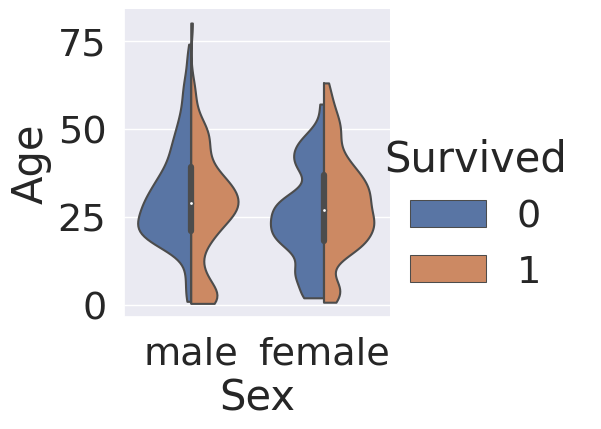

In [57]:
sns.catplot(data=df_train, x="Sex", y="Age", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

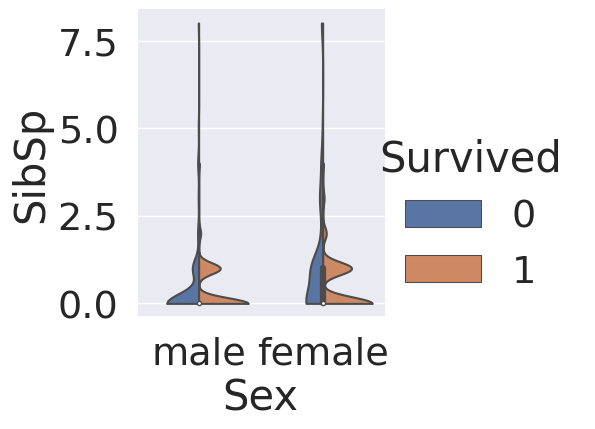

In [58]:
sns.catplot(data=df_train, x="Sex", y="SibSp", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

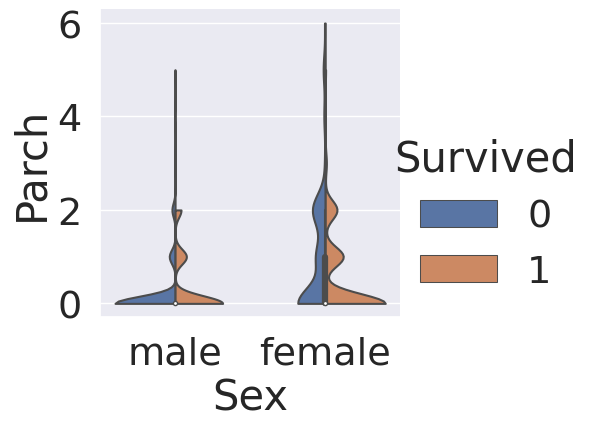

In [59]:
sns.catplot(data=df_train, x="Sex", y="Parch", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

In [60]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

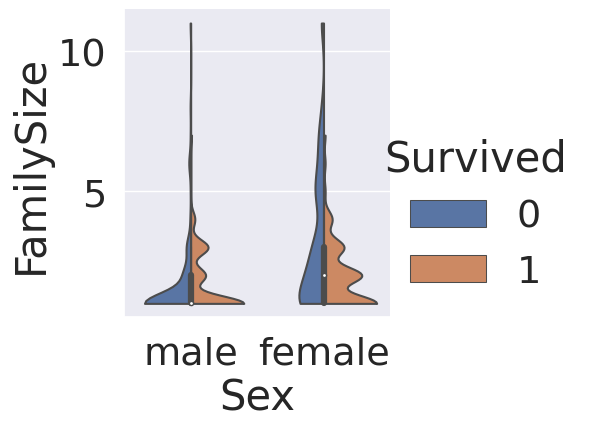

In [61]:
sns.catplot(data=df_train, x="Sex", y="FamilySize", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)